# Practica 1
## Análisis exploratorio de datos y Extracción de Características
## Autor: Diego Tapia

## Desarrollo

### Instalación e importación de librerías

In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 
import matplotlib as mpl
import seaborn as sns
import copy

print("Módulos y clases importados")

Módulos y clases importados


### 1. Carga y exploración inicial
Nombre del dataset: Analisis de personalidad de clientes
Enlace : https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/

Descripción:
 
El Análisis de la Personalidad del Cliente es un análisis detallado de los clientes ideales de una empresa. Ayuda a una empresa a comprender mejor a sus clientes y facilita la modificación de productos de acuerdo a las necesidades específicas, comportamientos y preocupaciones de diferentes tipos de clientes.

El análisis de la personalidad del cliente ayuda a una empresa a modificar su producto en función de sus clientes objetivos de diferentes segmentos de clientes. Por ejemplo, en lugar de gastar dinero en comercializar un nuevo producto a cada cliente en la base de datos de la empresa, la empresa puede analizar qué segmento de clientes es más probable que compre el producto y luego comercializar el producto solo a ese segmento en particular.


Numero de variables: 29

Numero de instacias: 2240

Descripción de las variables:

* **ID**: Identificador único del cliente
* **Year_Birth**: Año de nacimiento del cliente
* **Education**: Nivel educativo del cliente
* **Marital_Status**: Estado civil del cliente
* **Income**: Ingresos anuales del hogar del cliente
* **Kidhome**: Número de niños en el hogar del cliente
* **Teenhome**: Número de adolescentes en el hogar del cliente
* **Dt_Customer**: Fecha de inscripción del cliente en la empresa
* **Recency**: Número de días desde la última compra del cliente
* **Complain**: 1 si el cliente se quejó en los últimos 2 años, 0 en caso contrario
* **MntWines**: cantidad gastada en vinos en los últimos 2 años
* **MntFruits**: Cantidad gastada en frutas en los últimos 2 años
* **MntMeatProducts**: Cantidad gastada en carne en los últimos 2 años
* **MntFishProducts**: Cantidad gastada en pescado en los últimos 2 años
* **MntSweetProducts**: Cantidad gastada en dulces en los últimos 2 años
* **MntGoldProds**: Cantidad gastada en productos de oro en los últimos 2 años
* **NumWebPurchases**: Número de compras realizadas a través del sitio web de la empresa
* **NumCatalogPurchases**: Número de compras realizadas utilizando un catálogo
* **NumStorePurchases**: Número de compras realizadas directamente en tiendas
* **NumWebVisitsMonth**: Número de visitas al sitio web de la empresa en el último mes
* **NumDealsPurchases**: Número de compras realizadas con descuento
* **AcceptedCmp1**: 1 si el cliente aceptó la oferta en la primera campaña, 0 en caso contrario
* **AcceptedCmp2**: 1 si el cliente aceptó la oferta en la segunda campaña, 0 en caso contrario
* **AcceptedCmp3**: 1 si el cliente aceptó la oferta en la tercera campaña, 0 en caso contrario
* **AcceptedCmp4**: 1 si el cliente aceptó la oferta en la cuarta campaña, 0 en caso contrario
* **AcceptedCmp5**: 1 si el cliente aceptó la oferta en la quinta campaña, 0 en caso contrario
* **Response**: 1 si el cliente aceptó la oferta en la última campaña, 0 en caso contrario


In [3]:
# Cargar dataframe desde url de csv alojado en repositorio de github
url_dataframe = 'https://raw.githubusercontent.com/juandtap/IA_practica_01/main/marketing_campaign.csv'
# el separador es una tabulacion (\t) y la primera fila son los encabezados (header= 0)
dfOriginal = pd.read_csv(url_dataframe, sep='\t', header=0)
dataframe = copy.deepcopy(dfOriginal)
print("Tamaño del dataset: "+str(dataframe.shape[0])+" filas x "+str(dataframe.shape[1])+" columnas")
# Se muestran las 10 primeros registros
dataframe.head(10)

Tamaño del dataset: 2240 filas x 29 columnas


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Resumen estadístico
Se calcula las medidas descriptivas de las variables que tienen formato numérico

In [5]:
dataframe.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


Medidas descriptivas que no se visualizan 

Numero de compras web:

In [16]:
print("Media de numero de compras web: "+str(dataframe['NumWebPurchases'].mean()))
print("Maximo de numero de compras web: "+str(dataframe['NumWebPurchases'].max()))
print("Minimo de numero de compras web: "+str(dataframe['NumWebPurchases'].min()))

Media de numero de compras web: 4.084821428571429
Maximo de numero de compras web: 27
Minimo de numero de compras web: 0


Numero de compras en la tienda:

In [17]:
print("Media de numero de compras en la tienda: "+str(dataframe['NumStorePurchases'].mean()))
print("Maximo numero de compras en la tienda: "+str(dataframe['NumStorePurchases'].max()))
print("Minimo numero de compras en la tienda: "+str(dataframe['NumStorePurchases'].min()))

Media de numero de compras en la tienda: 5.790178571428571
Maximo numero de compras en la tienda: 13
Minimo numero de compras en la tienda: 0


Numero de visitas web por mes

In [18]:
print("Media de número de visitas web por mes: "+str(dataframe['NumWebVisitsMonth'].mean()))
print("Maxima de número de visitas web por mes: "+str(dataframe['NumWebVisitsMonth'].max()))
print("Minima de número de visitas web por mes: "+str(dataframe['NumWebVisitsMonth'].min()))

Media de número de visitas web por mes: 5.316517857142857
Maxima de número de visitas web por mes: 20
Minima de número de visitas web por mes: 0


### Conclusiones de la exploración inicial (estadisticas)

**Año de nacimiento medio**: el año de nacimiento medio es 1968, lo que quiere decir que la mayoría de los clientes son adultos mayores (55 años). 

**Año de nacimiento máximo**: El año de nacimiento máximo es 1996, lo que quiere decir que los clientes más jóvenes son de 27 de años.  

**Cantidad gastada en vinos media**: Esta cantidad es $ 303.93, que es mayor al resto de medias de gastos en otros productos en el dataset. Lo cual tiene sentido ya que la mayoría de los clientes son adultos mayores. 

**Numero de compras web**: Se asume que el valor es del último mes. La media de numero de compras web es de 4, mientras que el máximo es de 27 y el mínimo de 0, De acuerdo a la media de 4 se puede decir que es un medio de compra bueno (no muy alejado de 5.79 que es la media de compras en la tienda) y puede crecer por lo que se debería enfocarse en la mejora del sitio web en el tema de usabilidad ya que como se vio anteriormente la mayoría de los clientes son adultos mayores (media de 55 años). 

## 2. Visualización de datos

### Graficos de frecuencia de clase

Variable: Response (Respuesta)

Response
0    1906
1     334
Name: count, dtype: int64

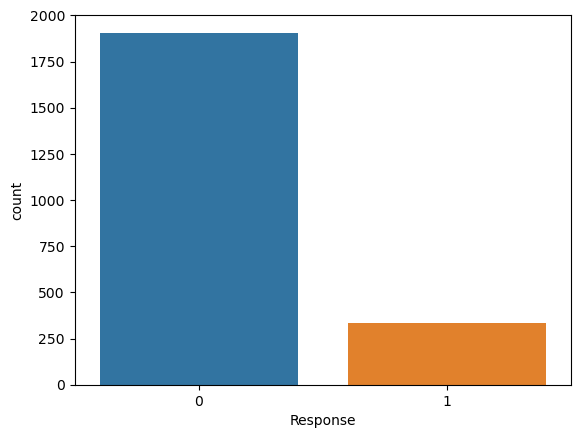

In [13]:
Y = dataframe['Response']
sns.countplot(x=Y)
dataframe['Response'].value_counts()

Variable: Education (Educacion)

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

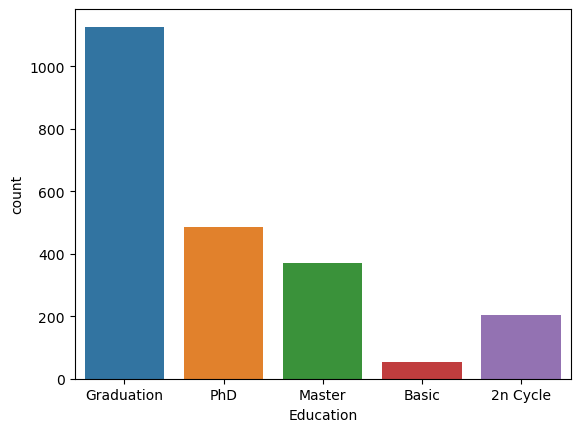

In [14]:
Y = dataframe['Education']
sns.countplot(x=Y)
dataframe['Education'].value_counts()

Variable: Kidhome (Niños en casa)

Kidhome
0    1293
1     899
2      48
Name: count, dtype: int64

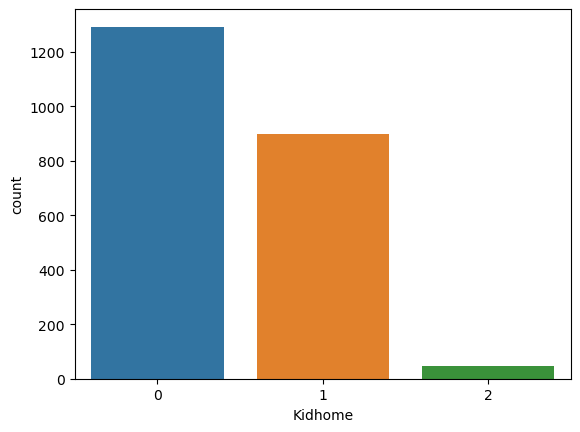

In [15]:
Y = dataframe['Kidhome']
sns.countplot(x=Y)
dataframe['Kidhome'].value_counts()

### Ordenamiento del dataframe por una variable

(Year_Birth)

In [16]:
dataframeTratamiento = dataframe.sort_values(by=['Year_Birth'])
# Mostrar los diez primeros datos
dataframeTratamiento.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
239,11004,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,...,4,0,0,0,0,0,0,3,11,0
339,1150,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,...,1,0,0,1,0,0,0,3,11,0
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,...,5,0,0,0,0,0,1,3,11,0
1950,6663,1940,PhD,Single,51141.0,0,0,08-07-2013,96,144,...,5,0,0,0,0,0,0,3,11,0
424,6932,1941,PhD,Married,93027.0,0,0,13-04-2013,77,1285,...,2,0,0,1,0,0,0,3,11,0
1150,1453,1943,PhD,Widow,57513.0,0,0,06-07-2013,59,735,...,6,0,0,0,0,0,0,3,11,0
415,7106,1943,PhD,Married,75865.0,0,0,31-03-2014,73,483,...,1,0,0,0,0,0,0,3,11,0
2084,5250,1943,Master,Widow,NaN,0,0,30-10-2013,75,532,...,1,0,0,1,0,0,0,3,11,1
358,6142,1943,Master,Married,65073.0,0,0,20-08-2013,65,629,...,2,0,0,0,0,0,1,3,11,0
1923,4994,1943,Master,Single,77598.0,0,0,01-10-2013,53,1193,...,3,0,0,1,0,0,0,3,11,0


### Visualización 2D: varias variables para análisis
Variables: 
* "Year_Birth" (Año nacimiento), 
* "Income" (Ingresos anuales)

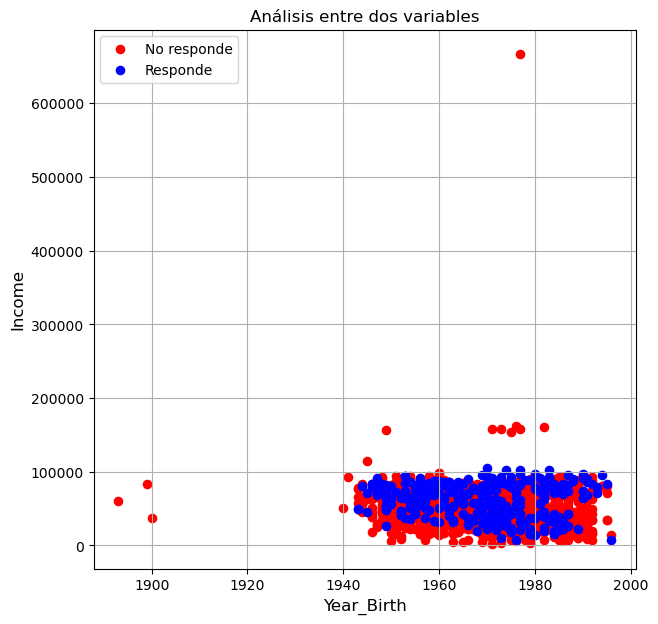

In [34]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Year_Birth', fontsize =12)
ax.set_ylabel('Income', fontsize = 12)
ax.set_title('Análisis entre dos variables', fontsize = 12)
targets = [0, 1] # Respuesta a la publicidad; 0 no reponde, 1 responde
colors = ['r', 'b']
for target, color in zip(targets, colors):
    indexTokeep = dataframeTratamiento['Response'] == target
    ax.scatter(dataframeTratamiento.loc[indexTokeep, 'Year_Birth'],
               dataframeTratamiento.loc[indexTokeep, 'Income'],
               c = color,
               s = 35 # tamaño de los puntos
               )
ax.legend(['No responde','Responde'])
ax.grid()
plt.show()



### Visualización 2D: una variable para análisis
Variable "Income" (ingreso anual)

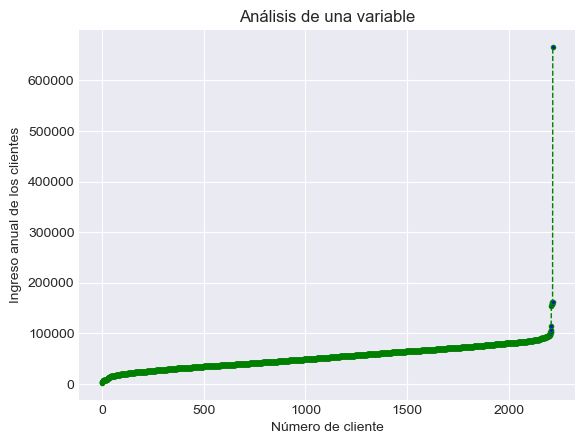

In [46]:
dataframeTratamientoOrdenado = dataframeTratamiento.sort_values(by=["Income"])
variable_analisis = dataframeTratamientoOrdenado.loc[:,['Income']]
cantidad_muestras = len(dataframeTratamientoOrdenado.index)
array_cantidad_muestras = range(cantidad_muestras)

plt.plot(array_cantidad_muestras, variable_analisis, color= 'green', linestyle="dashed", linewidth = 1, marker='o', markerfacecolor='blue', markersize = 3)
plt.title('Análisis de una variable')
plt.xlabel('Número de cliente')
plt.ylabel('Ingreso anual de los clientes')
plt.show()

## 3. Análisis de variables categóricas

In [49]:

def descripcion_cantidad_categorias(dataframe, categorical_features):
    cantidad_variables_categoricas = len(categorical_features)
    for var in categorical_features:
        cantidad_categorias = dataframe[var].nunique()
        print(f"Cantidad de categorías en la variable {var} : {cantidad_categorias}")
    return cantidad_variables_categoricas


In [50]:

columnas_categoricas = list(dataframe.select_dtypes(include=['object']).columns)
print(columnas_categoricas)

['Education', 'Marital_Status', 'Dt_Customer']


La variable “Dt_Customer” que almacena la fecha de registro del cliente es una variable de tipo numérica ya que representa tiempo,  por lo que procedemos a eliminarla de la lista de variables categóricas. 

In [25]:
columnas_categoricas.pop()
cantidad_variables_categoricas = descripcion_cantidad_categorias(dataframe, columnas_categoricas)
print(f"Cantidad de variables categóricas : {cantidad_variables_categoricas}")


Cantidad de categorías en la variable Education : 5
Cantidad de categorías en la variable Marital_Status : 8
Cantidad de variables categóricas : 2


Hay 2 variables categóricas 

* 'Education' (Educacion), 
* 'Marital_Status' (Estado civil)

Las variables 'Education' y 'Marital_Status' son variables categóricas nominales

En la variable 'Education'  se tiene las siguientes categorias:

In [26]:
dataframe['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

En la variable 'Marital_Status' se tiene las siguentes categorias:

In [27]:
dataframe['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

## 4. Análisis de correlación

### Análisis entre todas las variables

In [33]:
cr = dataframe.corr(numeric_only=True)
cr.head(10)

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,1.000000,0.000028,0.013095,0.002406,-0.002580,-0.046524,-0.022878,0.004600,-0.004437,-0.024475,...,-0.007446,-0.036040,-0.025387,-0.007517,-0.021614,-0.015061,0.033883,NaN,NaN,-0.021968
Year_Birth,0.000028,1.000000,-0.161791,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,...,0.121139,0.061774,-0.060510,0.007123,-0.005930,-0.006539,-0.030128,NaN,NaN,0.021325
Income,0.013095,-0.161791,1.000000,-0.428669,0.019133,-0.003970,0.578650,0.430842,0.584633,0.438871,...,-0.553088,-0.016174,0.184400,0.335943,0.276820,0.087545,-0.027225,NaN,NaN,0.133047
Kidhome,0.002406,0.230176,-0.428669,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,...,0.447846,0.014674,-0.161600,-0.205634,-0.172339,-0.081716,0.040207,NaN,NaN,-0.080008
Teenhome,-0.002580,-0.352111,0.019133,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,...,0.134884,-0.042677,0.038886,-0.191050,-0.140090,-0.015605,0.003138,NaN,NaN,-0.154446
Recency,-0.046524,-0.019871,-0.003970,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,...,-0.021445,-0.032991,0.018826,0.000129,-0.019283,-0.001781,0.013231,NaN,NaN,-0.198437
MntWines,-0.022878,-0.157773,0.578650,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,...,-0.320653,0.062202,0.373286,0.472613,0.354133,0.205907,-0.039007,NaN,NaN,0.247254
MntFruits,0.004600,-0.017917,0.430842,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,...,-0.418383,0.014727,0.010152,0.215833,0.194748,-0.009773,-0.005166,NaN,NaN,0.125289
MntMeatProducts,-0.004437,-0.030872,0.584633,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,...,-0.539470,0.018272,0.102912,0.373769,0.309761,0.043033,-0.023483,NaN,NaN,0.236335
MntFishProducts,-0.024475,-0.041625,0.438871,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,...,-0.446003,0.000357,0.016843,0.199578,0.260762,0.002577,-0.020953,NaN,NaN,0.111331


### Un mapa de calor simple

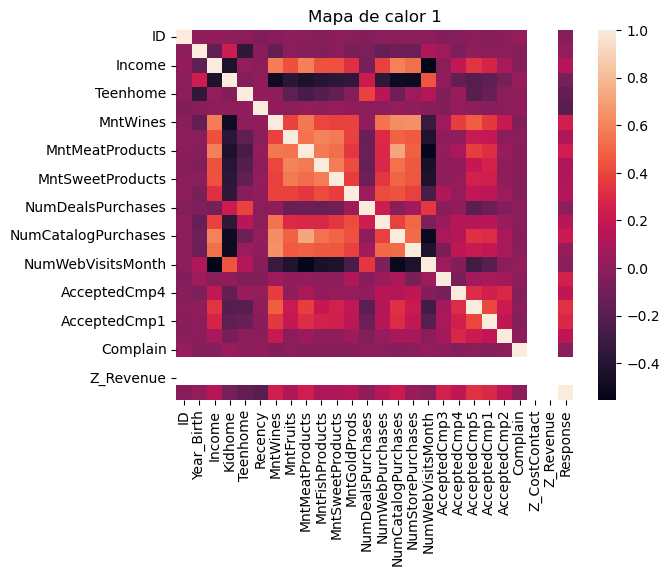

In [34]:
sns.heatmap(cr)
plt.title("Mapa de calor 1")
plt.show()

<Axes: >

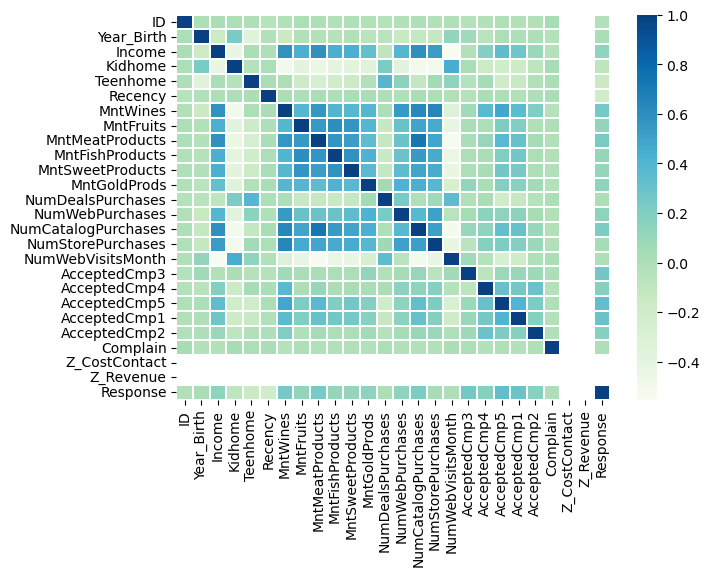

In [35]:
#Un mapa de calor personalizado: colores, tamaño
fig, ax  = plt.subplots(figsize = (7,5))
sns.heatmap(cr, cmap= "GnBu", linewidths = 0.30, annot=False)

### Mapa de calor personalizado
Solo se incluye la región inferior

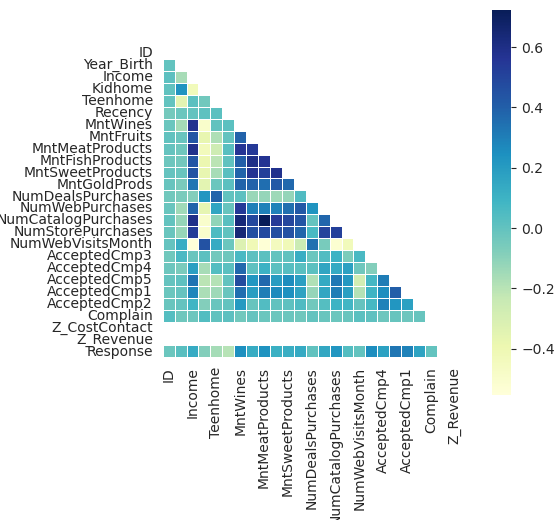

In [36]:
mask = np.zeros_like(cr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(5,5))
    ax = sns.heatmap(cr, mask=mask, square=True, linewidths=.5, cmap="YlGnBu")
plt.show()

### Análisis a partir de los valores: correlaciones positivas

Se hace una análisis de las correlaciones con respecto a la variable 'Response'

In [54]:
dfCorrOrdenado=cr.sort_values(by=['Response'], ascending=False)
dfCorrOrdenado['Response'].head(20)

Response               1.000000
AcceptedCmp5           0.326634
AcceptedCmp1           0.293982
AcceptedCmp3           0.254258
MntWines               0.247254
MntMeatProducts        0.236335
NumCatalogPurchases    0.220810
AcceptedCmp4           0.177019
AcceptedCmp2           0.169293
NumWebPurchases        0.148730
MntGoldProds           0.139850
Income                 0.133047
MntFruits              0.125289
MntSweetProducts       0.117372
MntFishProducts        0.111331
NumStorePurchases      0.039363
Year_Birth             0.021325
NumDealsPurchases      0.002238
Complain              -0.001707
NumWebVisitsMonth     -0.003987
Name: Response, dtype: float64

### Análisis a partir de los valores: correlaciones negativas

In [53]:
dfCorrOrdenado=cr.sort_values(by=['Response'], ascending=True)
dfCorrOrdenado['Response'].head(20)

Recency               -0.198437
Teenhome              -0.154446
Kidhome               -0.080008
ID                    -0.021968
NumWebVisitsMonth     -0.003987
Complain              -0.001707
NumDealsPurchases      0.002238
Year_Birth             0.021325
NumStorePurchases      0.039363
MntFishProducts        0.111331
MntSweetProducts       0.117372
MntFruits              0.125289
Income                 0.133047
MntGoldProds           0.139850
NumWebPurchases        0.148730
AcceptedCmp2           0.169293
AcceptedCmp4           0.177019
NumCatalogPurchases    0.220810
MntMeatProducts        0.236335
MntWines               0.247254
Name: Response, dtype: float64

### Visualización para análisis entre dos variables
Se hace un análisis de correlacion entre las variables 'Income' y 'Year_Birth'

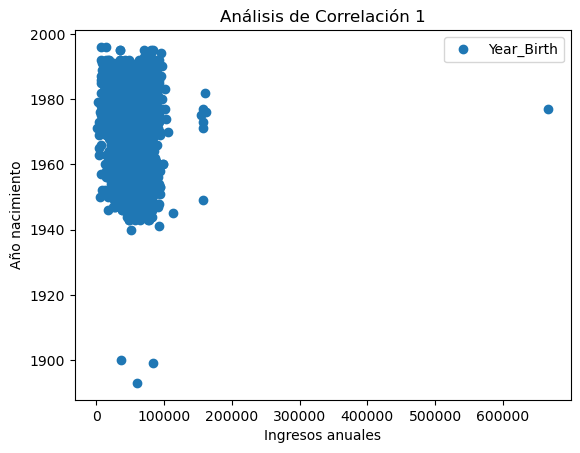

In [64]:
variable_1_analisis = "Income"
variable_2_analisis = "Year_Birth"
dataframe.plot(x = variable_1_analisis, y = variable_2_analisis, style="o")
plt.title("Análisis de Correlación 1")
plt.xlabel("Ingresos anuales")
plt.ylabel("Año nacimiento")
plt.show()


## 5. Manejo de datos faltantes y variables no relevantes

Se descartan algunas variables que se supone no aportan al análisis o tienen datos faltantes.

Se elimina la variable 'ID' que no aporta información util para los análisis



In [48]:
#Se eliminan algunas variables
#dataframe=dataframe.drop(['ID'], axis=1)
print(dataframe.shape)
dataframe.head()

(2240, 28)


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0


## 6. Selección y extracción de variables

Selección de variables según el análisis de correlación


In [61]:

variables_seleccionadas = ['Year_Birth', 'Income', 'MntWines', 'MntMeatProducts', 'NumCatalogPurchases', 'NumWebPurchases', 'NumStorePurchases',  'Response']
dataframe_nuevo = dataframe[variables_seleccionadas]
print(dataframe_nuevo.shape)
dataframe_nuevo.head()


(2240, 8)


,Year_Birth,Income,MntWines,MntMeatProducts,NumCatalogPurchases,NumWebPurchases,NumStorePurchases,Response
0,1957,58138.0,635,546,10,8,4,1
1,1954,46344.0,11,6,1,1,2,0
2,1965,71613.0,426,127,2,8,10,0
3,1984,26646.0,11,20,0,2,4,0
4,1981,58293.0,173,118,3,5,6,0


## 7. Segmentación y filtros

Se ordena el nuevo dataframe por la variable Year_Birth (Año Nacimiento) 

In [63]:
dataframe_tratamiento = dataframe_nuevo.sort_values(by=['Year_Birth'])
print(dataframe_tratamiento.shape)
dataframe_tratamiento.head()

(2240, 8)


,Year_Birth,Income,MntWines,MntMeatProducts,NumCatalogPurchases,NumWebPurchases,NumStorePurchases,Response
239,1893,60182.0,8,5,0,1,2,0
339,1899,83532.0,755,562,6,4,4,0
192,1900,36640.0,15,8,1,2,2,0
1950,1940,51141.0,144,7,1,3,4,0
424,1941,93027.0,1285,716,10,7,5,0


### Filtración por variables: 'Year_Birth' e 'Income'

para los valores maximos y minimos de las variables se toma como referencia el grafico de correlacion 1 (2 variables)

In [65]:

# limits de valores para 'Income'
income_min = 20000
income_max = 100000
# limites de valores para 'Year_Birth'
year_min = 1960
year_max = 1990

dataframe_filtrado = dataframe_tratamiento.loc[(dataframe_tratamiento['Year_Birth'] >= year_min) &  (dataframe_tratamiento['Year_Birth'] <= year_max)]
dataframe_filtrado = dataframe_filtrado.loc[(dataframe_tratamiento['Income'] >= income_min) &  (dataframe_tratamiento['Income'] <= income_max)]
print(dataframe_filtrado.shape)
dataframe_filtrado.head(10)


(1493, 8)


,Year_Birth,Income,MntWines,MntMeatProducts,NumCatalogPurchases,NumWebPurchases,NumStorePurchases,Response
640,1960,63381.0,571,142,5,4,13,0
366,1960,79530.0,333,815,10,4,11,0
1373,1960,50611.0,459,24,5,4,7,0
633,1960,32218.0,10,15,1,2,3,1
1375,1960,48904.0,283,38,2,7,4,0
627,1960,70971.0,1001,572,11,11,5,1
387,1960,63381.0,571,142,5,4,13,0
619,1960,30522.0,179,83,2,1,9,0
96,1960,47916.0,505,26,4,7,6,0
1371,1960,50523.0,51,24,0,2,4,0


Se calcula la media de todas las variables para lo clientes con el mismo Año de nacimiento e Ingresos anuales y
se agrupa por estas dos ultimas variables (Year_Birth , Income)

In [79]:
dataframe_segmento = dataframe_filtrado.groupby(['Year_Birth','Income'])
dataframe_segmento = dataframe_segmento.mean()
dataframe_segmento.head(10)

MntWines  MntMeatProducts  NumCatalogPurchases  \
Year_Birth Income                                                    
1960       22123.0       3.0             24.0                  1.0   
           28520.0      11.0             10.0                  1.0   
           29315.0      13.0             14.0                  0.0   
           29440.0      17.0             14.0                  0.0   
           30507.0      65.0             74.0                  1.0   
           30522.0     179.0             83.0                  2.0   
           31454.0      28.0             11.0                  0.0   
           32218.0      10.0             15.0                  1.0   
           38201.0     233.0             23.0                  1.0   
           39228.0       7.0              6.0                  0.0   

                    NumWebPurchases  NumStorePurchases  Response  
Year_Birth Income                                                 
1960       22123.0              2.0                3.0       0.0  
           28520.0              1.0                2.0       0.0  
           29315.0              2.0                4.0       0.0  
           29440.0              1.0                4.0       0.0  
           30507.0              5.0                4.0       0.0  
           30522.0              1.0                9.0       0.0  
           31454.0              2.0                3.0       0.0  
           32218.0              2.0                3.0       1.0  
           38201.0              5.0                5.0       0.0  
           39228.0              0.0                3.0       0.0

Se agrupa solo con una variable 'Year_Birth' (Año nacimiento)

In [80]:
dataframe_segmento = dataframe_segmento.groupby('Year_Birth')
dataframe_segmento.head(2)

MntWines  MntMeatProducts  NumCatalogPurchases  \
Year_Birth Income                                                    
1960       22123.0       3.0             24.0                  1.0   
           28520.0      11.0             10.0                  1.0   
1961       27116.0      12.0             21.0                  0.0   
           27215.0      30.0             22.0                  1.0   
1962       27238.0      37.0             17.0                  0.0   
...                      ...              ...                  ...   
1988       23331.0      54.5             54.0                  0.5   
1989       21474.0       6.0             24.0                  1.0   
           25443.0       1.0              3.0                  0.0   
1990       24279.0      16.0             21.0                  1.0   
           24683.0       8.0             10.0                  0.0   

                    NumWebPurchases  NumStorePurchases  Response  
Year_Birth Income                                                 
1960       22123.0              2.0                3.0       0.0  
           28520.0              1.0                2.0       0.0  
1961       27116.0              2.0                3.0       0.0  
           27215.0              2.0                4.0       0.0  
1962       27238.0              3.0                3.0       0.0  
...                             ...                ...       ...  
1988       23331.0              4.0                4.0       0.0  
1989       21474.0              3.0                2.0       1.0  
           25443.0              1.0                3.0       0.0  
1990       24279.0              4.0                3.0       0.0  
           24683.0              2.0                4.0       0.0  

[62 rows x 6 columns]

## 8. Análisis y eliminación de outliers

De ```dataframe_filtrado``` se normaliza los datos a valores entre 0 y 1

In [85]:
from sklearn import preprocessing
data_scaled_minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
data_scaled_minmax = data_scaled_minmax.fit_transform(dataframe_filtrado)
dataframe_scaled_minmax = pd.DataFrame(data=data_scaled_minmax, columns=dataframe_filtrado.columns)
print(dataframe_scaled_minmax.shape)
dataframe_scaled_minmax.head(10)

(1493, 8)


,Year_Birth,Income,MntWines,MntMeatProducts,NumCatalogPurchases,NumWebPurchases,NumStorePurchases,Response
0,0.0,0.549938,0.384253,0.143438,0.454545,0.363636,1.000000,0.0
1,0.0,0.755274,0.224092,0.828077,0.909091,0.363636,0.818182,0.0
2,0.0,0.387567,0.308883,0.023398,0.454545,0.363636,0.454545,0.0
3,0.0,0.153699,0.006729,0.014242,0.090909,0.181818,0.090909,1.0
4,0.0,0.365863,0.190444,0.037640,0.181818,0.636364,0.181818,0.0
5,0.0,0.646446,0.673620,0.580875,1.000000,1.000000,0.272727,1.0
6,0.0,0.549938,0.384253,0.143438,0.454545,0.363636,1.000000,0.0
7,0.0,0.132135,0.120458,0.083418,0.181818,0.090909,0.636364,0.0
8,0.0,0.353300,0.339838,0.025432,0.363636,0.636364,0.363636,0.0
9,0.0,0.386448,0.034320,0.023398,0.000000,0.181818,0.181818,0.0


### Visualización de outliers en figura 3D

Se utiliza las variables 'Year_Birth', 'Income' y 'MntWines'

In [88]:
import plotly.graph_objs as go
import numpy as np
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D

columnas_seleccionadas =  dataframe_scaled_minmax[['Year_Birth', 'Income' , 'MntWines']]

# se convierten las columnas seleccionadas a numpy.ndarray
data_array = columnas_seleccionadas.to_numpy()

# Se define un umbral de distancia euclidiana para identificar outliers
umbral = 1.2

# Calcula la distancia euclidiana desde el origen para cada uno de los puntos
distancias = np.linalg.norm(data_array, axis=1)

# indentificacion de los indices de los outliers
outliers_indices = np.where(distancias > umbral)[0]

# se separa los datos en dos grupos: puntos normales y outliers
puntos_normales  = data_array[distancias <= umbral]
outliers = data_array[outliers_indices]

# Se crea la figura 3d interactiva (esfera)
fig3d = go.Figure()

# plotea los puntos de datos normales dentro de la esfera

fig3d.add_trace(go.Scatter3d(
    x = puntos_normales[:,0],
    y = puntos_normales[:,1],
    z = puntos_normales[:,2],
    mode='markers',
    marker={'color':'blue', 'size': 4},
    name='Puntos Normales'

))

# plotea los outliers fuera de la esfera
fig3d.add_trace(go.Scatter3d(
    x=outliers[:, 0],
    y=outliers[:, 1],
    z=outliers[:, 2],
    mode='markers',
    marker={'color':'red', 'size':4},
    name='Outliers'
))

# Crea una esfera que excluye los outliers
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = umbral * np.outer(np.cos(u), np.sin(v))
y = umbral * np.outer(np.sin(u), np.sin(v))
z = umbral * np.outer(np.ones_like(u), np.cos(v))

fig3d.add_trace(go.Surface(x=x, y=y, z=z, colorscale='greens', opacity=0.3, showscale=False, name='Esfera Umbral'))

# Se configura el diseño de la figura
fig3d.update_layout(
    scene={
        'xaxis_title':'X: AÑO NACIMIENTO', #EJE X
        'yaxis_title':'Y: INGRESO ANUAL', #EJE Y
        'zaxis_title':'Z: GASTO EN VINO' #EJE Z
    },
    scene_camera={
        'center':{'x':0, 'y':0, 'z':0},
        'eye':{'x':1.25, 'y':1.25, 'z':1.25}
    }
)

# Se muestra la figura interactiva
fig3d.show()

Se guarda el dataframe con los outliers filtrados

In [93]:
dataframe_scaled_minmax['DIST'] = np.sqrt(dataframe_scaled_minmax['Year_Birth']**2 + dataframe_scaled_minmax['Income']**2 + dataframe_scaled_minmax['MntWines']**2)
# Se filtra el DataFrame para obtener solo las muestras dentro de la esfera
df_filtrado = dataframe_scaled_minmax[dataframe_scaled_minmax['DIST'] <= umbral]
df_filtrado = df_filtrado.drop(['DIST'], axis=1)
print(df_filtrado.shape)
df_filtrado.head(20)


(1431, 8)


,Year_Birth,Income,MntWines,MntMeatProducts,NumCatalogPurchases,NumWebPurchases,NumStorePurchases,Response
0,0.0,0.549938,0.384253,0.143438,0.454545,0.363636,1.000000,0.0
1,0.0,0.755274,0.224092,0.828077,0.909091,0.363636,0.818182,0.0
2,0.0,0.387567,0.308883,0.023398,0.454545,0.363636,0.454545,0.0
3,0.0,0.153699,0.006729,0.014242,0.090909,0.181818,0.090909,1.0
4,0.0,0.365863,0.190444,0.037640,0.181818,0.636364,0.181818,0.0
5,0.0,0.646446,0.673620,0.580875,1.000000,1.000000,0.272727,1.0
6,0.0,0.549938,0.384253,0.143438,0.454545,0.363636,1.000000,0.0
7,0.0,0.132135,0.120458,0.083418,0.181818,0.090909,0.636364,0.0
8,0.0,0.353300,0.339838,0.025432,0.363636,0.636364,0.363636,0.0
9,0.0,0.386448,0.034320,0.023398,0.000000,0.181818,0.181818,0.0


## 9. Conlusiones

En esta guía se ha revisado métodos para visualizar estadísticas o gráficos, para así tener una idea inicial del dataset con el que se está trabajando. También se ha revisado métodos para descubrir valores atípicos conocidos también como “Outliers” y como extraerlos o filtrarlos para un análisis más preciso. Por supuesto, los métodos o estrategias mostradas en esta guía no siempre deben seguirse estrictamente ya que dependerá de los datos del “dataset” con el que se está trabajando. 

El análisis de los datos es importante para llegar a conclusiones y consecuentemente a una toma de decisiones. En este caso se ha trabajado con el “dataset” de una tienda (donde se asume que es una muestra) donde se a partir de un analisis de correlacion con respecto a la variable “Respuesta” que indica si tuvo efecto la última campaña publicitaria, (1=Si, 0 = No) se puede llegar a observar que las variables que más influyen son los “ingresos anuales” de los clientes y la “cantidad de gasto en vino”, y no la variable de “año de nacimiento” de la cual se puede concluir que se está tratando con clientes que en su mayoría son adultos mayores. 

Con estas conclusiones y también las observaciones de otras variables como “Numero de compras Web” se puede llegar a considerar mejorar el sitio web de compra, haciéndolo más intuitivo para los clientes que son adultos mayores. 

## Referencias

guia:

https://genscinet.com/analisis-exploratorio/

Dataset:

https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/

